In [ ]:
pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
from scipy import stats
import pylab
from sqlalchemy import create_engine
medi= pd.read_csv(r"/content/drive/MyDrive/ProjectData.csv")
medi

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,12018098765,Specialisation6,Department1,6/1/2022,1,0,55.406,59.260,0.0,Form1,ZINC ACETATE 20MG/5ML SYP,SYRUP & SUSPENSION,VITAMINS & MINERALS
1,Sale,12018103897,Specialisation7,Department1,7/23/2022,1,0,768.638,950.800,0.0,Form1,CEFTAZIDIME 2GM+AVIBACTAM 500MG,INJECTIONS,ANTI-INFECTIVES
2,Sale,12018101123,Specialisation2,Department3,6/23/2022,1,0,774.266,4004.214,0.0,Form2,EPTIFIBATIDE 0.75MG/ML,INJECTIONS,CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3,Sale,12018079281,Specialisation40,Department1,3/17/2022,2,0,40.798,81.044,0.0,Form1,WATER FOR INJECTION 10ML SOLUTION,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
4,Sale,12018117928,Specialisation5,Department1,12/21/2022,1,0,40.434,40.504,0.0,Form1,LORAZEPAM 1MG,TABLETS & CAPSULES,CENTRAL NERVOUS SYSTEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14213,Sale,12018099994,Specialisation39,Department1,6/19/2022,3,0,61.436,145.200,0.0,Form1,SODIUM CHLORIDE IVF 100ML,"IV FLUIDS, ELECTROLYTES, TPN",INTRAVENOUS & OTHER STERILE SOLUTIONS
14214,Sale,12018047025,Specialisation4,Department1,2/24/2022,2,0,64.448,119.692,0.0,Form1,PIPERACILLIN 1GM + TAZOBACTAM 125MG,INJECTIONS,ANTI-INFECTIVES
14215,Sale,12018017139,Specialisation1,Department1,6/27/2022,4,0,74.944,642.040,0.0,Form1,PARACETAMOL 1GM IV INJ,INJECTIONS,CENTRAL NERVOUS SYSTEM
14216,Sale,12018044140,Specialisation20,Department1,7/30/2022,1,0,111.680,181.000,0.0,Form3,MEROPENEM 1GM INJ,INJECTIONS,ANTI-INFECTIVES


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Data PreProcessing**

In [ ]:
medi.dtypes

Typeofsales        object
Patient_ID          int64
Specialisation     object
Dept               object
Dateofbill         object
Quantity            int64
ReturnQuantity      int64
Final_Cost        float64
Final_Sales       float64
RtnMRP            float64
Formulation        object
DrugName           object
SubCat             object
SubCat1            object
dtype: object

In [ ]:
medi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     14218 non-null  object 
 1   Patient_ID      14218 non-null  int64  
 2   Specialisation  14218 non-null  object 
 3   Dept            14218 non-null  object 
 4   Dateofbill      14218 non-null  object 
 5   Quantity        14218 non-null  int64  
 6   ReturnQuantity  14218 non-null  int64  
 7   Final_Cost      14218 non-null  float64
 8   Final_Sales     14218 non-null  float64
 9   RtnMRP          14218 non-null  float64
 10  Formulation     13565 non-null  object 
 11  DrugName        12550 non-null  object 
 12  SubCat          12549 non-null  object 
 13  SubCat1         12526 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.5+ MB


In [ ]:
medi.describe()

,Patient_ID,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP
count,1.421800e+04,14218.000000,14218.000000,14218.000000,14218.000000,14218.000000
mean,1.201809e+10,2.231748,0.291954,124.823957,234.038300,29.126755
std,2.810229e+04,5.132043,1.643322,464.782794,671.261572,182.262335
min,1.201800e+10,0.000000,0.000000,40.000000,0.000000,0.000000
25%,1.201808e+10,1.000000,0.000000,44.928000,47.815000,0.000000
50%,1.201809e+10,1.000000,0.000000,53.650000,86.424000,0.000000
75%,1.201811e+10,2.000000,0.000000,77.800000,181.000000,0.000000
max,1.201813e+10,150.000000,50.000000,33178.000000,39490.000000,8014.000000


In [ ]:
medi_drop = medi.dropna()   #Drop the null value

In [ ]:
duplicate = medi_drop.duplicated()  # Checking for duplicate values
duplicate

sum(duplicate)

15

In [ ]:
#Cheking for missing values
medi.isna().sum()

Typeofsales          0
Patient_ID           0
Specialisation       0
Dept                 0
Dateofbill           0
Quantity             0
ReturnQuantity       0
Final_Cost           0
Final_Sales          0
RtnMRP               0
Formulation        653
DrugName          1668
SubCat            1669
SubCat1           1692
dtype: int64

# **Exploratory Data Analysis**

**First Moment Business Decission/Measure of Central Tendency**

*   Mean
*   Median
*   Mode

In [ ]:
medi.mean()

<ipython-input-62-f520ea9b5b27>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medi.mean()


Patient_ID        1.201809e+10
Quantity          2.231748e+00
ReturnQuantity    2.919539e-01
Final_Cost        1.248240e+02
Final_Sales       2.340383e+02
RtnMRP            2.912675e+01
dtype: float64

In [ ]:
medi.median()

<ipython-input-63-1f278aca272c>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medi.median()


Patient_ID        1.201809e+10
Quantity          1.000000e+00
ReturnQuantity    0.000000e+00
Final_Cost        5.365000e+01
Final_Sales       8.642400e+01
RtnMRP            0.000000e+00
dtype: float64

In [ ]:
medi.mode()

,Typeofsales,Patient_ID,Specialisation,Dept,Dateofbill,Quantity,ReturnQuantity,Final_Cost,Final_Sales,RtnMRP,Formulation,DrugName,SubCat,SubCat1
0,Sale,1.201807e+10,Specialisation4,Department1,7/7/2022,1.0,0.0,49.352,0.0,0.0,Form1,SODIUM CHLORIDE IVF 100ML,INJECTIONS,INTRAVENOUS & OTHER STERILE SOLUTIONS
1,NaN,NaN,NaN,NaN,7/9/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Second Moment Business Decission/Measure of Dispersion**

*   Variance
*   Standard Deviation
*   Range

In [ ]:
medi.var()

<ipython-input-65-ca24401c28b8>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medi.var()


Patient_ID        7.897389e+08
Quantity          2.633786e+01
ReturnQuantity    2.700506e+00
Final_Cost        2.160230e+05
Final_Sales       4.505921e+05
RtnMRP            3.321956e+04
dtype: float64

INSIGHTS:

All the columns have high variance.

In [ ]:
medi.std()

<ipython-input-66-d142a103314a>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medi.std()


Patient_ID        28102.293889
Quantity              5.132043
ReturnQuantity        1.643322
Final_Cost          464.782794
Final_Sales         671.261572
RtnMRP              182.262335
dtype: float64

INSIGHTS:

'Quantity' have high standard deviation.

'Final_Cost' & 'Final_Sales' have extremely high standard deviation.

In [ ]:
range = max(medi.Quantity) - min(medi.Quantity)
range

150

**Third Moment Business Decision/ Skewness**

In [ ]:
medi.skew()

<ipython-input-68-730b1cc98be2>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medi.skew()


Patient_ID        -1.366038
Quantity          11.341034
ReturnQuantity    17.172365
Final_Cost        34.508215
Final_Sales       21.006722
RtnMRP            15.797853
dtype: float64

INSIGHTS:

'Quantity', 'Final_Cost', 'Final_Sales':The value shows extreme positive skewness and skewed to the right side

**Forth Moment Business Decision/Kurtosis**

In [ ]:
medi.kurt()

<ipython-input-69-b15222ed9692>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medi.kurt()


Patient_ID           1.620651
Quantity           180.153858
ReturnQuantity     409.416914
Final_Cost        2025.866475
Final_Sales        948.522711
RtnMRP             403.524941
dtype: float64

INSIGHTS:

'Quantity', 'Final_Cost', 'Final_Sales': The value of these columns are positive so positive kurtosis,high peak,high frequency and thicker tail.The outliers are very high.

# **Graphical Representation**

In [ ]:
medi.shape

(14218, 14)

Bar Plot

<BarContainer object of 14218 artists>

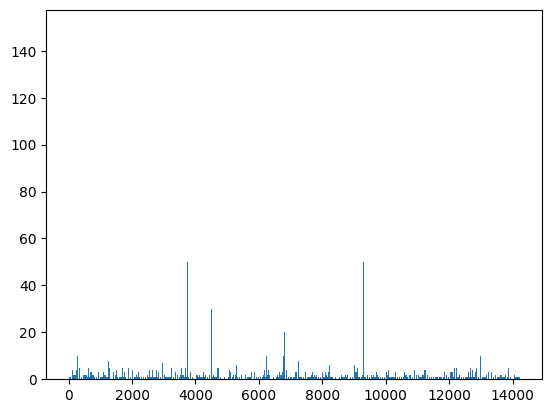

In [ ]:
plt.bar(height = medi.Quantity, x = np.arange(1,14219,1))

Histogram

array([[<Axes: title={'center': 'Patient_ID'}>,
        <Axes: title={'center': 'Quantity'}>],
       [<Axes: title={'center': 'ReturnQuantity'}>,
        <Axes: title={'center': 'Final_Cost'}>],
       [<Axes: title={'center': 'Final_Sales'}>,
        <Axes: title={'center': 'RtnMRP'}>]], dtype=object)

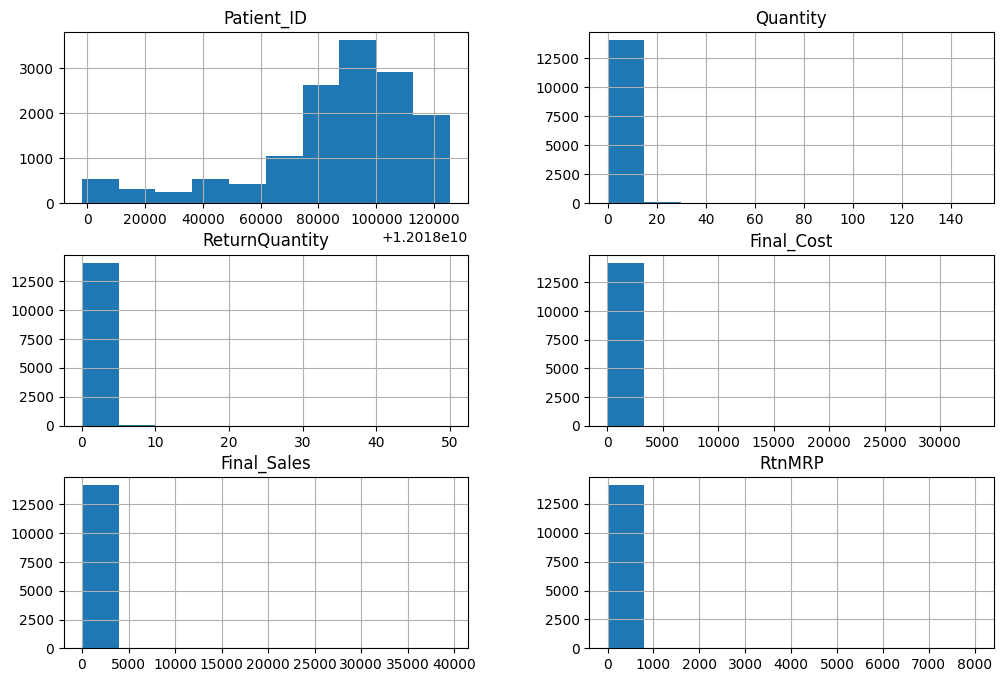

In [ ]:
medi.hist(figsize = (12,8))

INSIGHTS:

Looking at the histogram it is found that the columns: 'Patient_ID', 'Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP' have outlier because they are skewed to one of the sides.

Density Plot

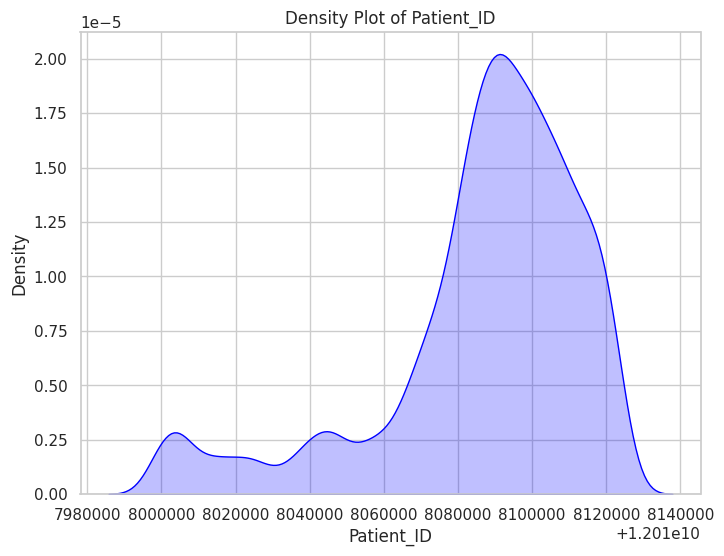

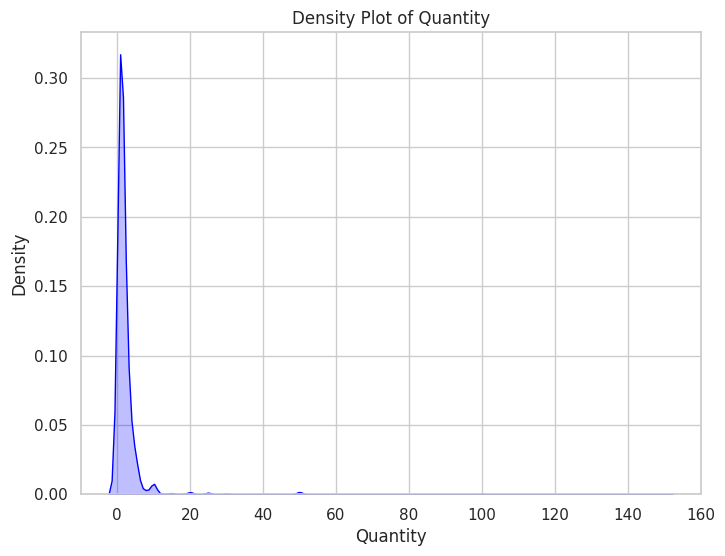

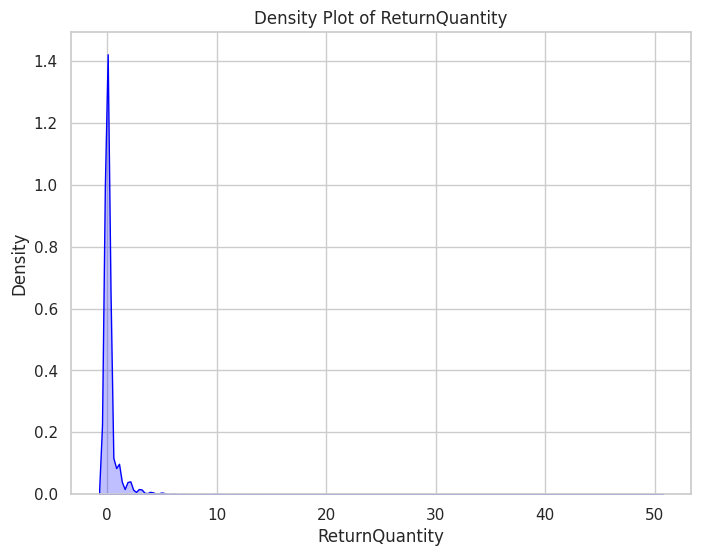

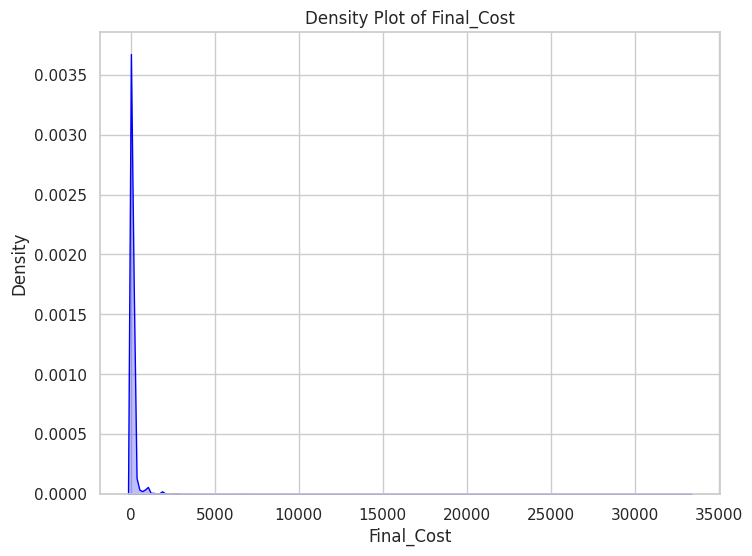

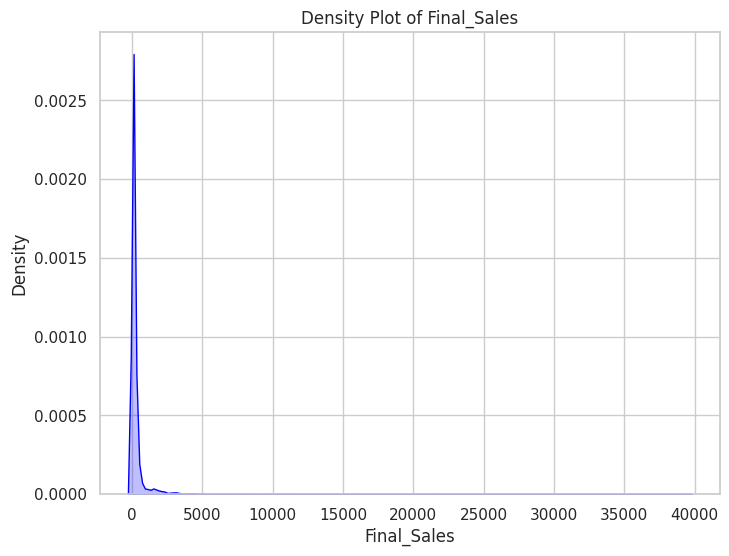

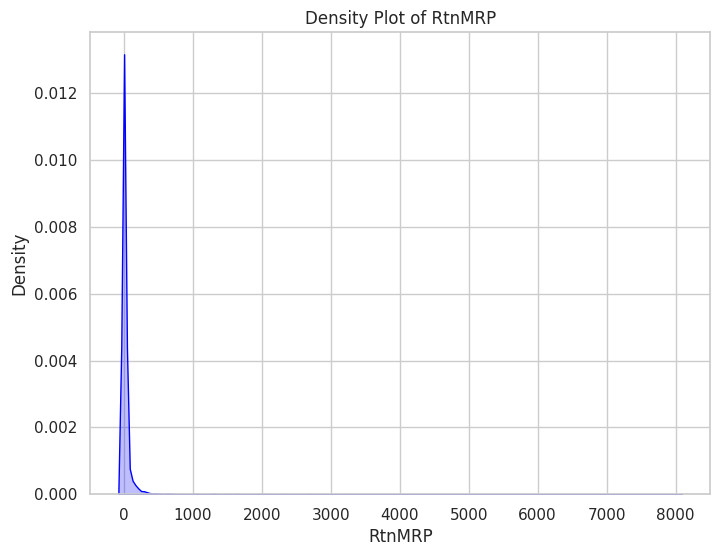

In [ ]:
columns_plot = ['Patient_ID', 'Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP']
sns.set(style= "whitegrid")
for column in columns_plot:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=medi, x=column, fill=True, color='blue')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

INSIGHT:

Here in columns like 'Patient_ID', 'Quantity', 'ReturnQuantity', 'Final_Cost', 'Final_Sales', 'RtnMRP' the plot is skewed to one side so there might be presence of outliers in there columns.Density Plot will be more suitable for visualising this.

**Scatterplot**

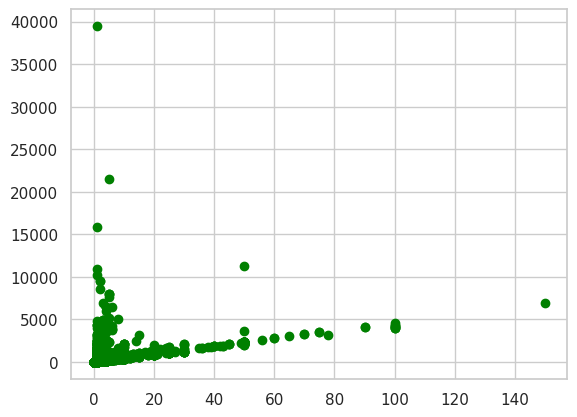

In [ ]:
plt.scatter(x = medi['Quantity'], y = medi['Final_Sales'], color = 'green')

PairPlot

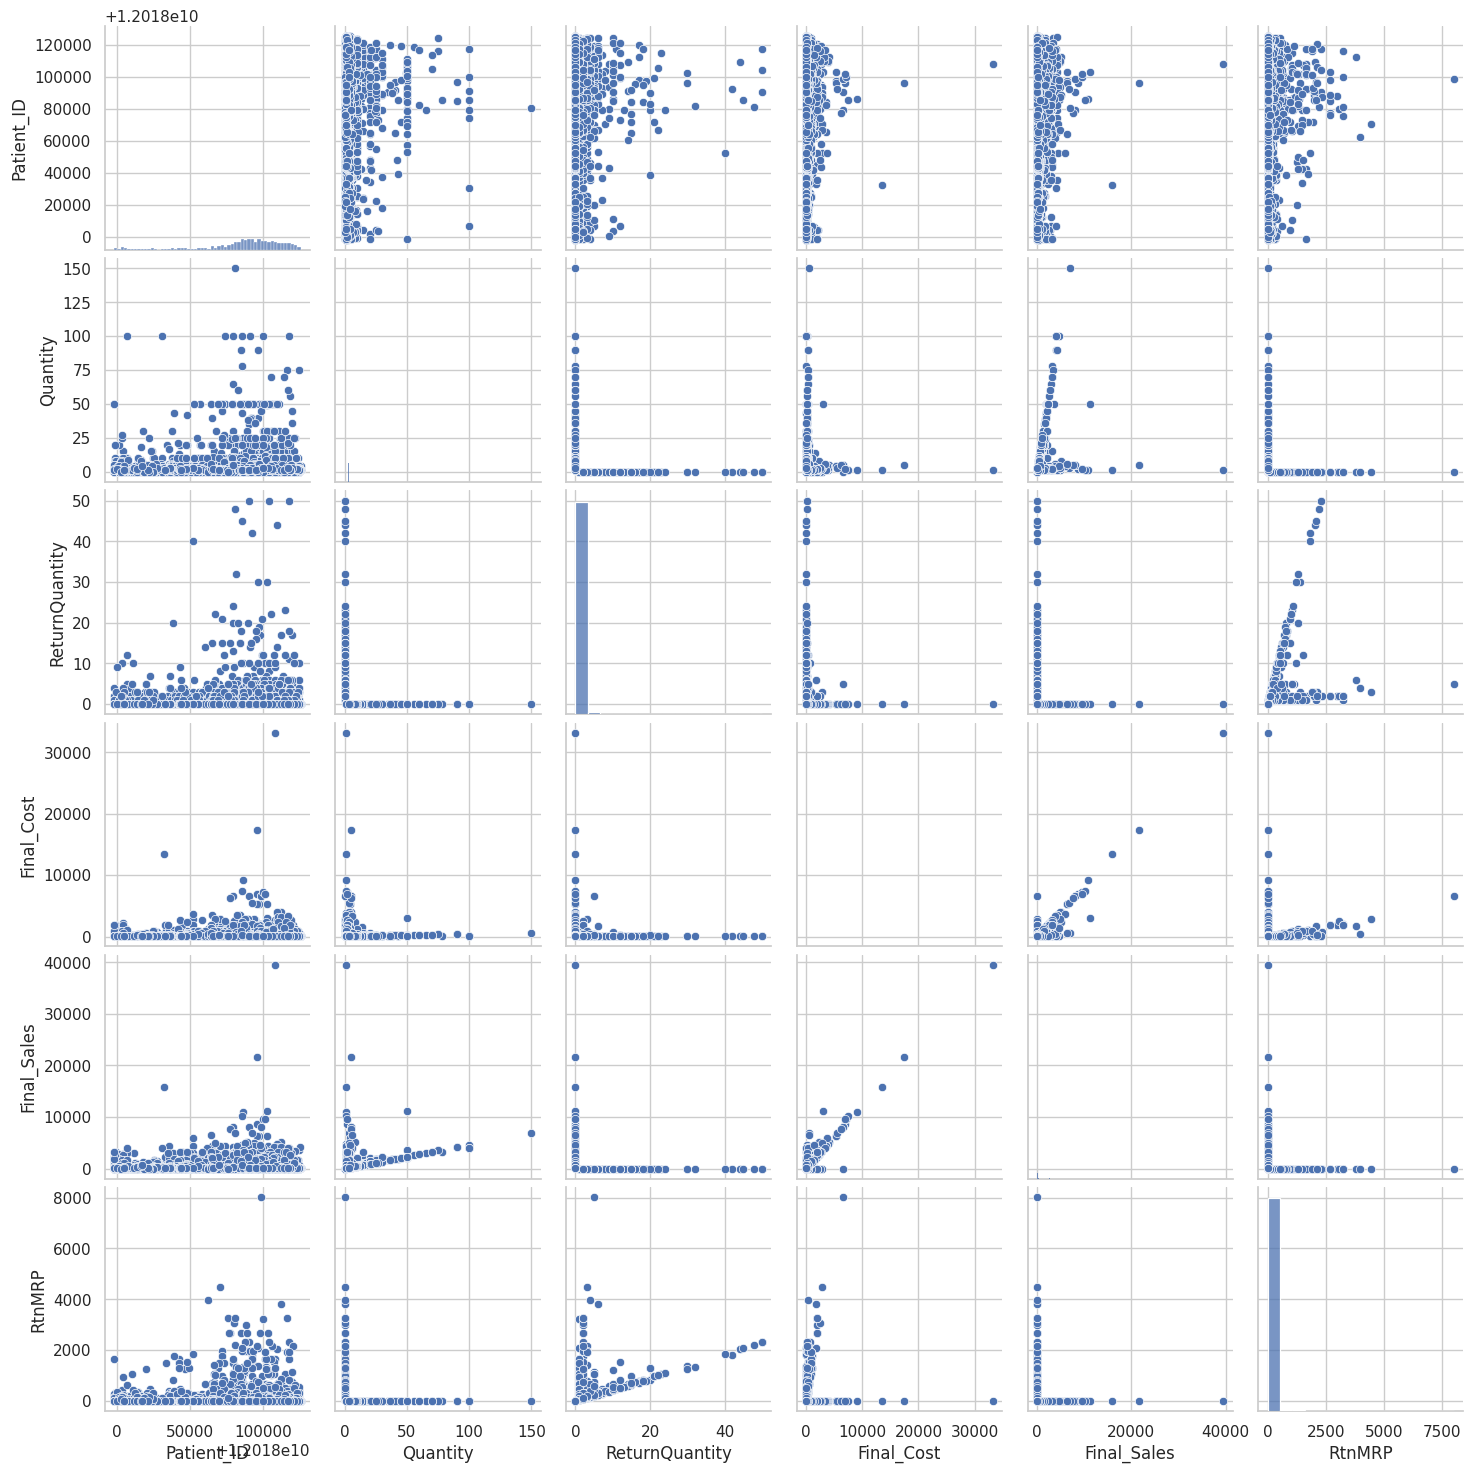

In [ ]:
sns.pairplot(medi)

# **Auto EDA**

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/ProjectData.csv")

In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 28.0 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


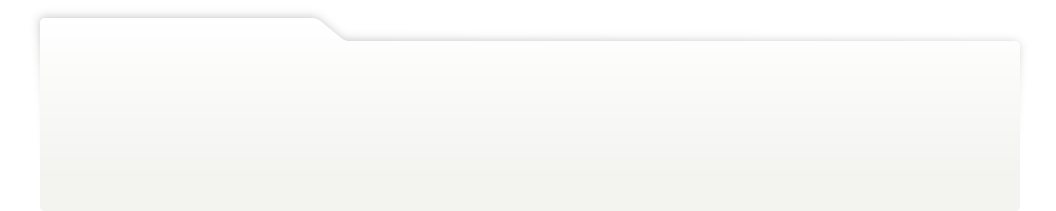
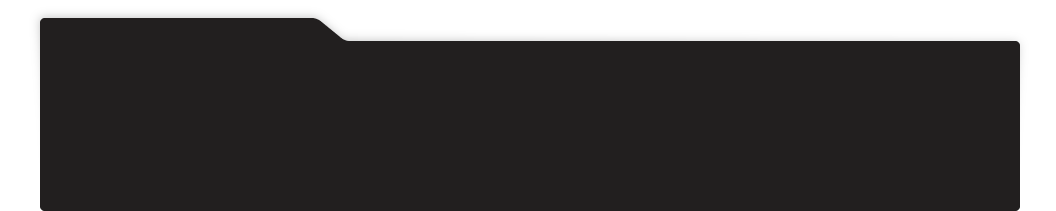
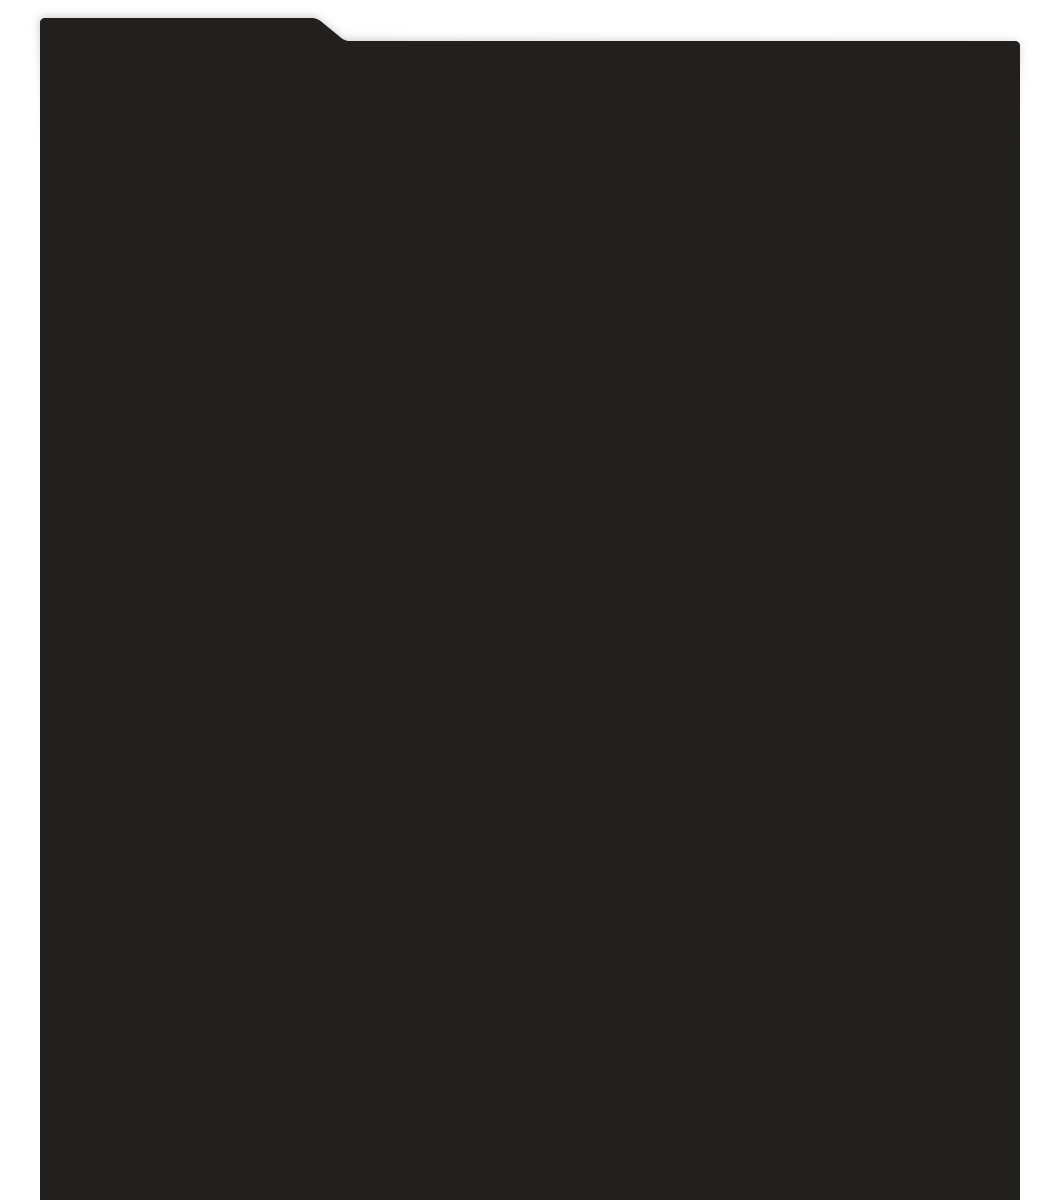
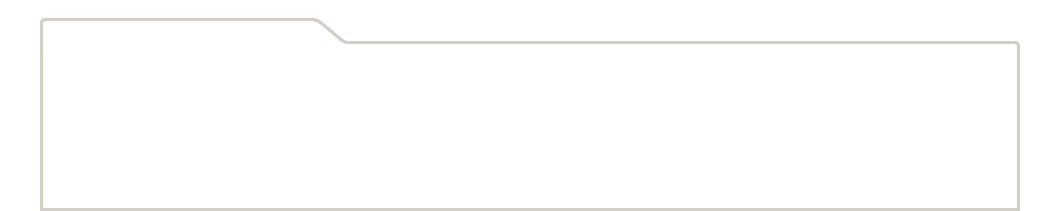
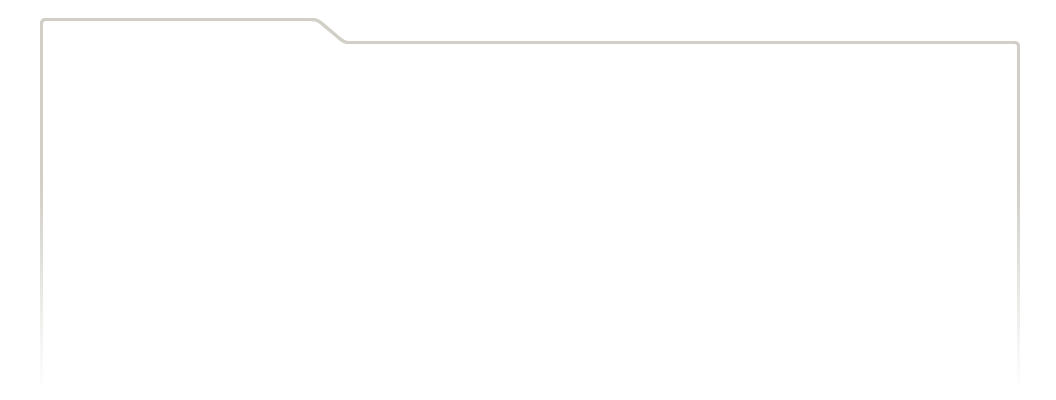
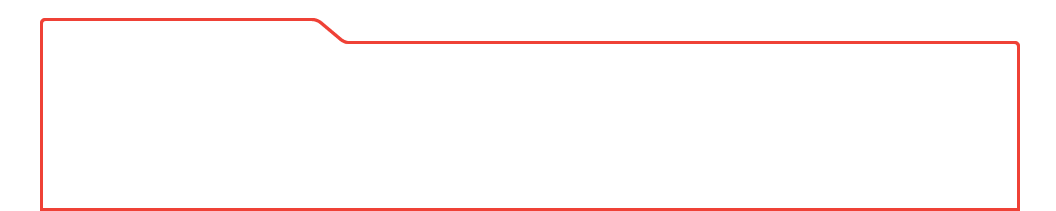
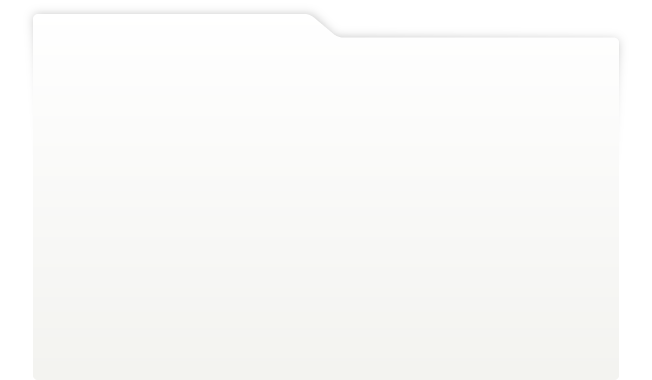
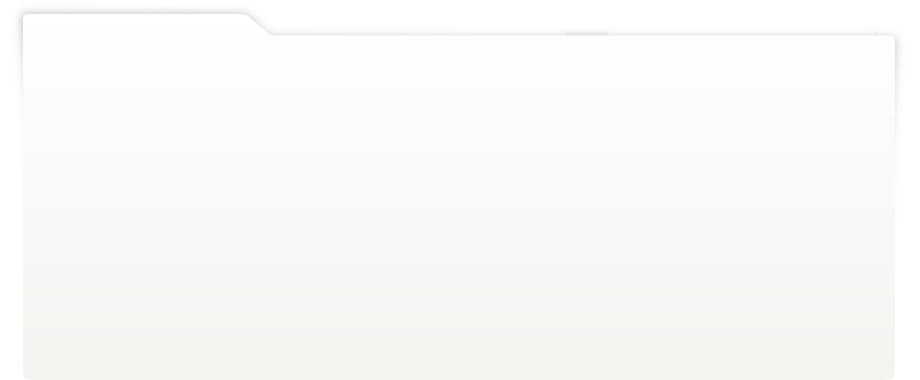
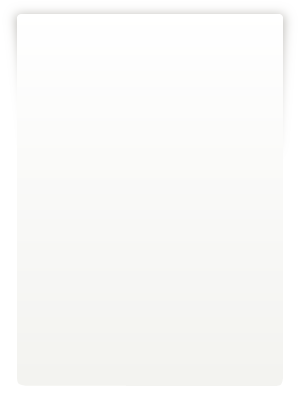
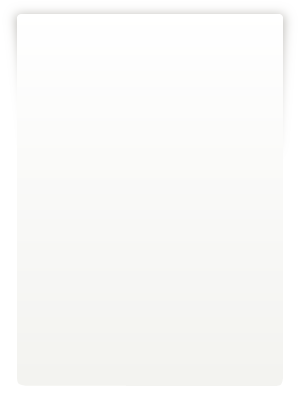
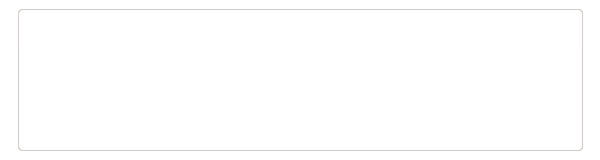
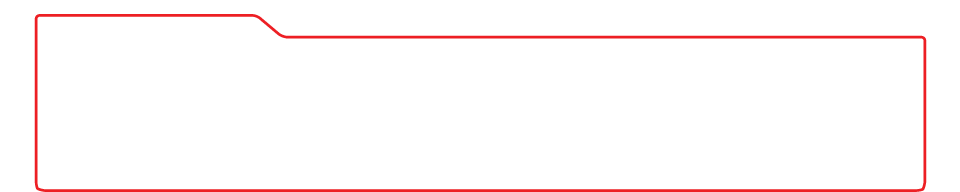
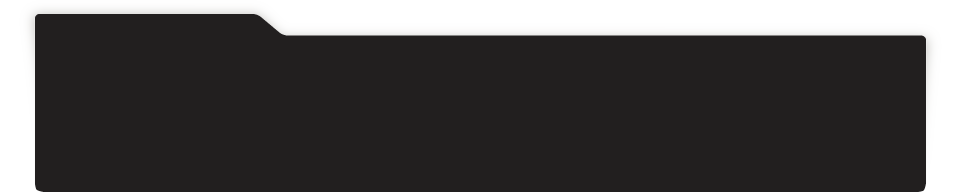
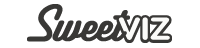
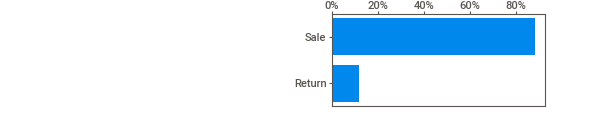
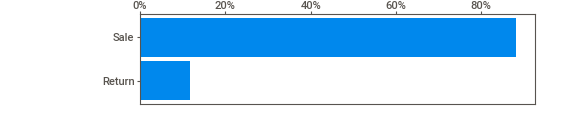
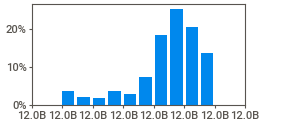
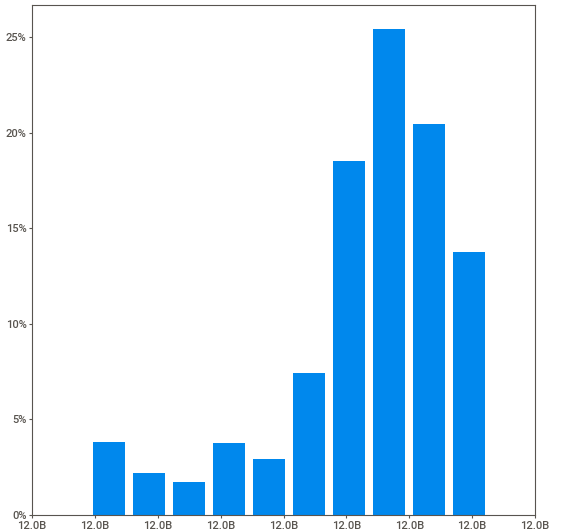
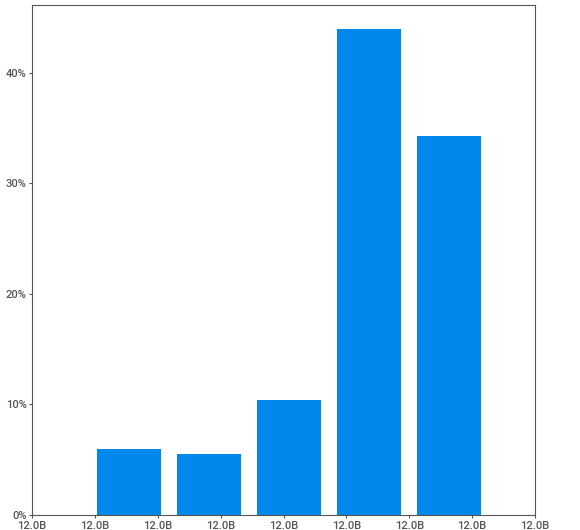
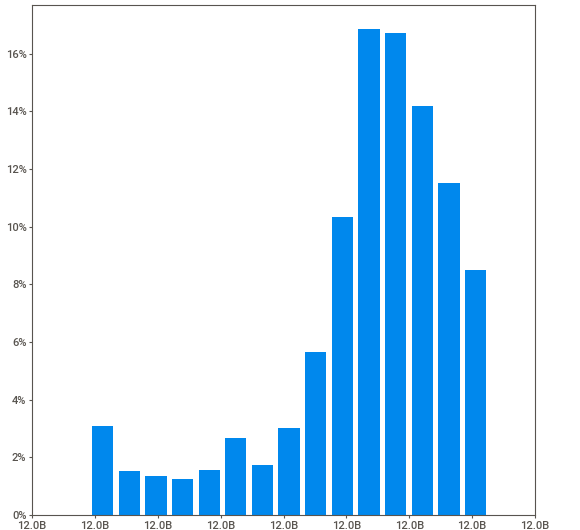
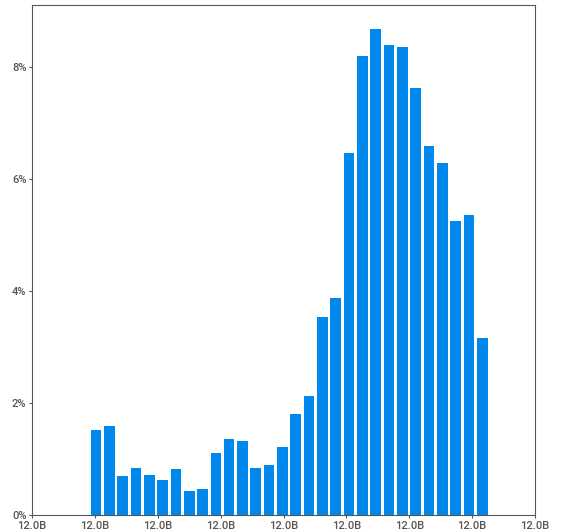
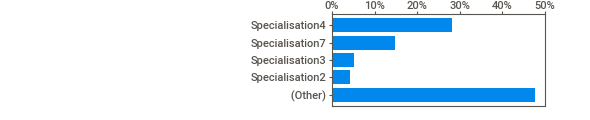
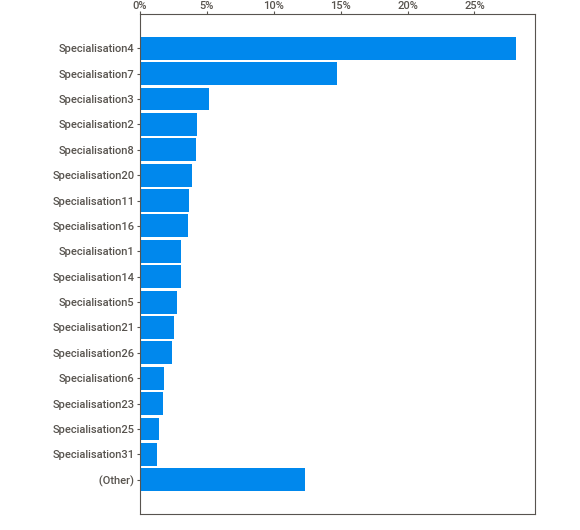
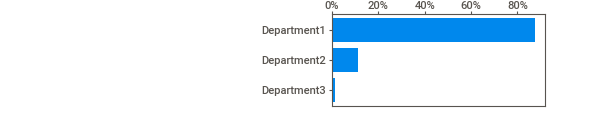
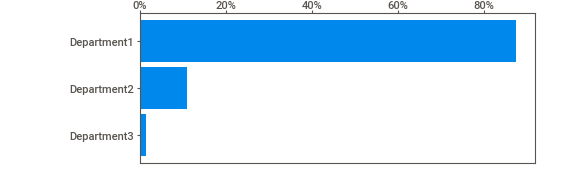
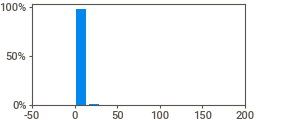
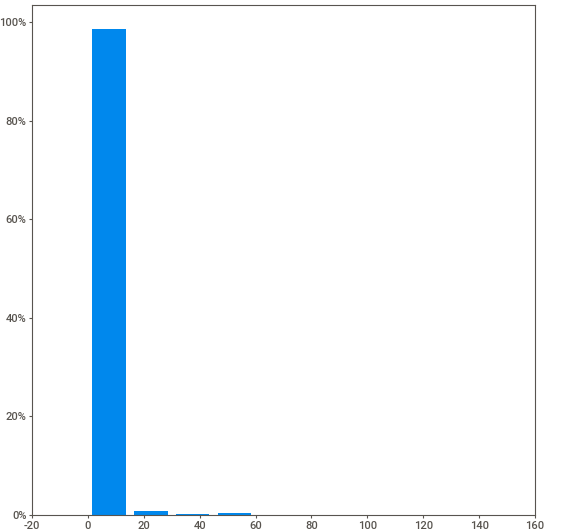
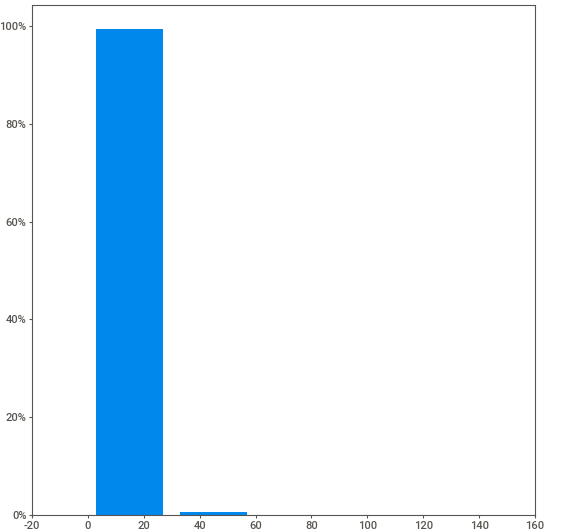
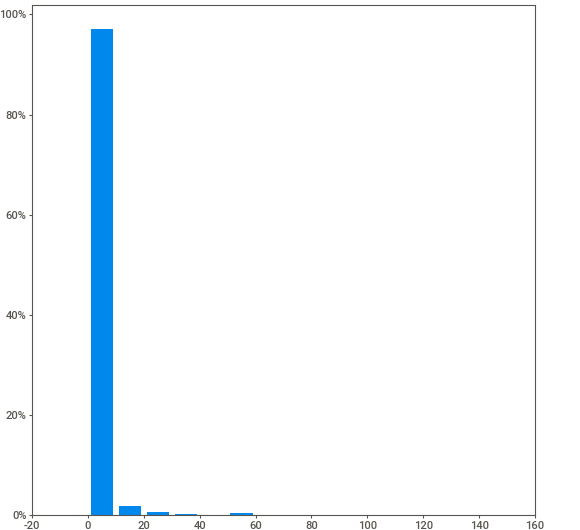
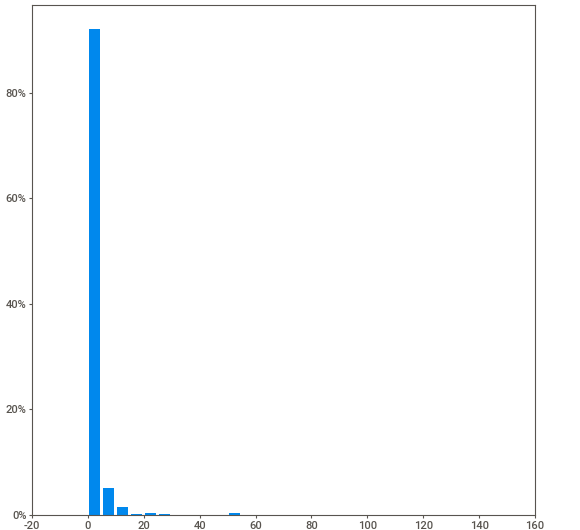
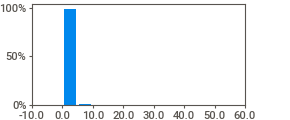
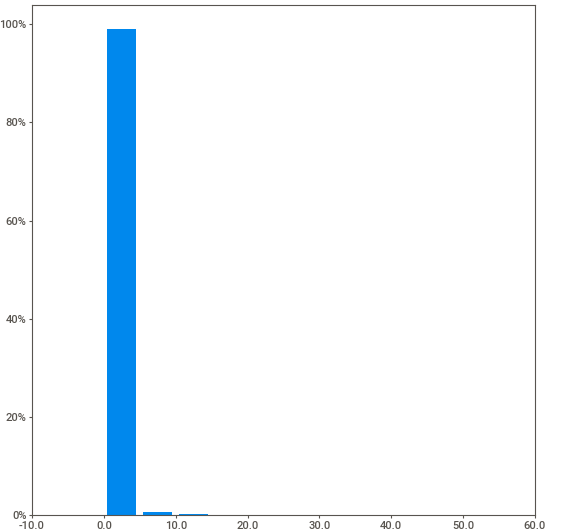
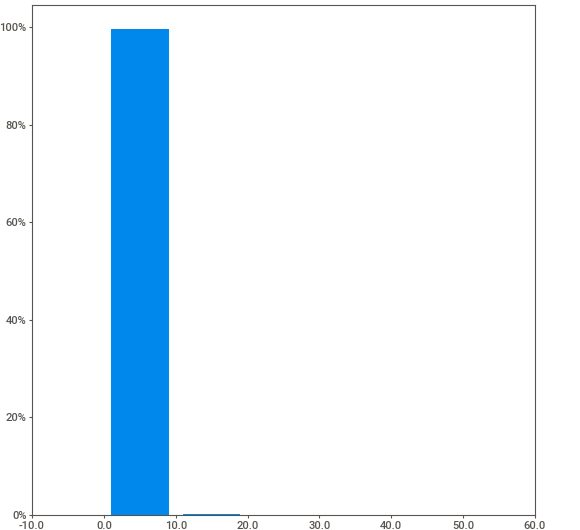
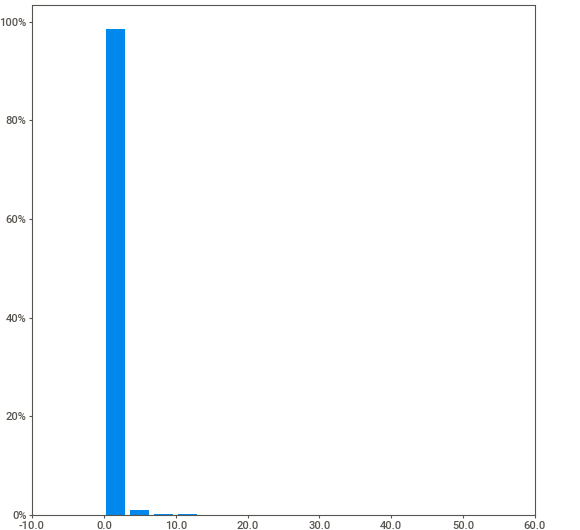
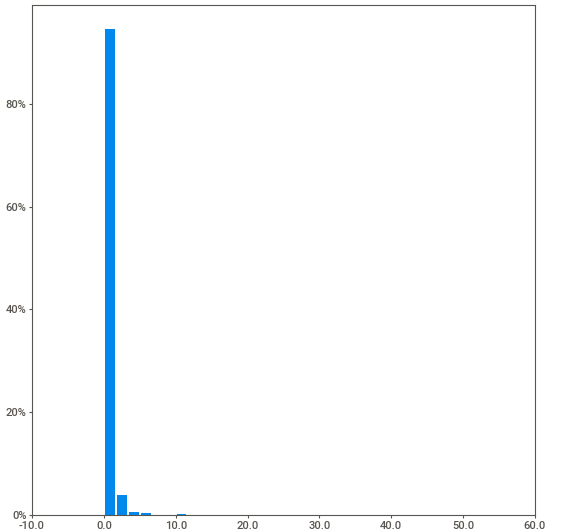
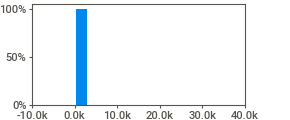
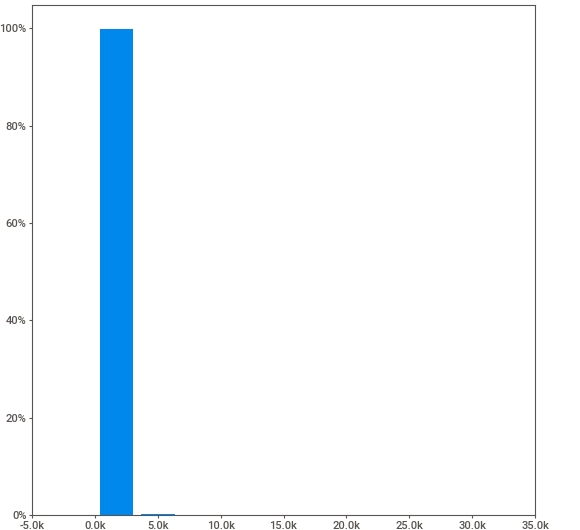
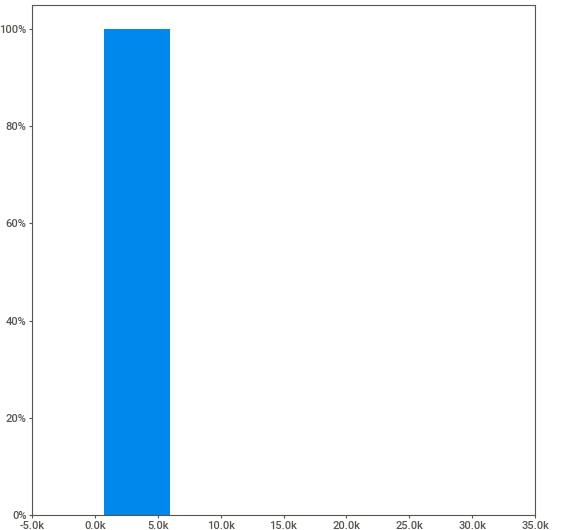
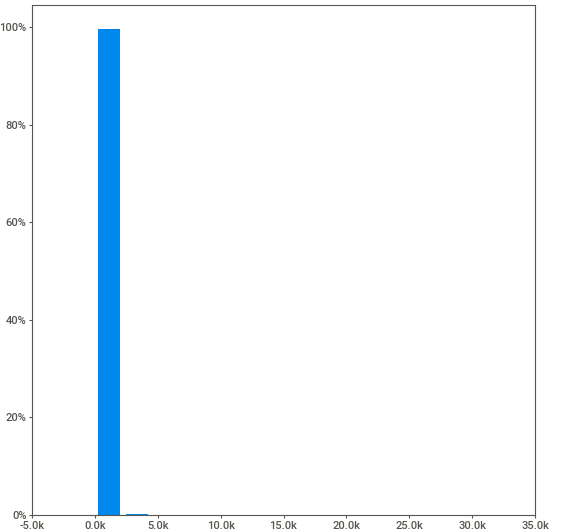
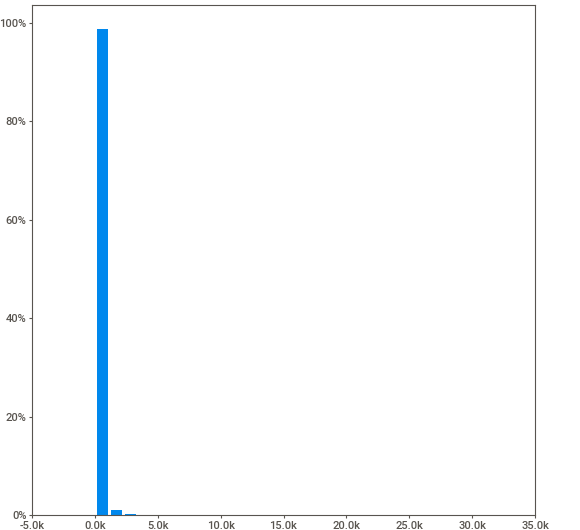
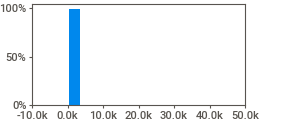
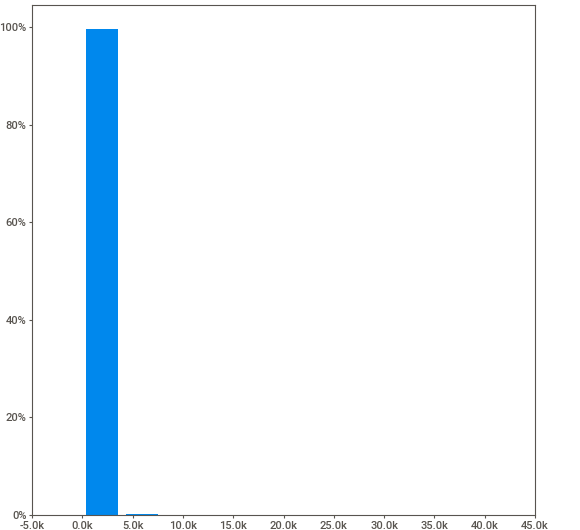
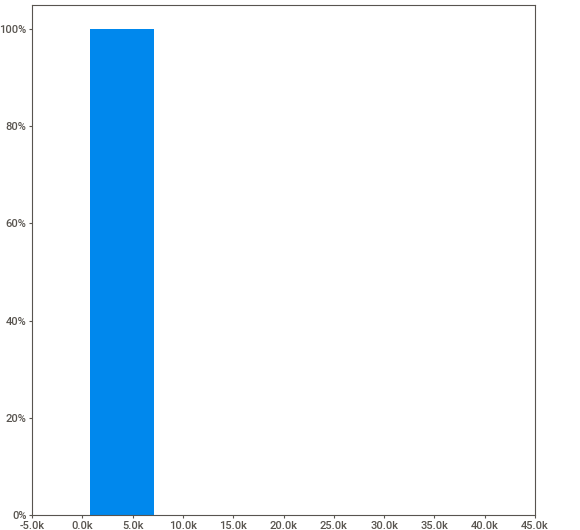
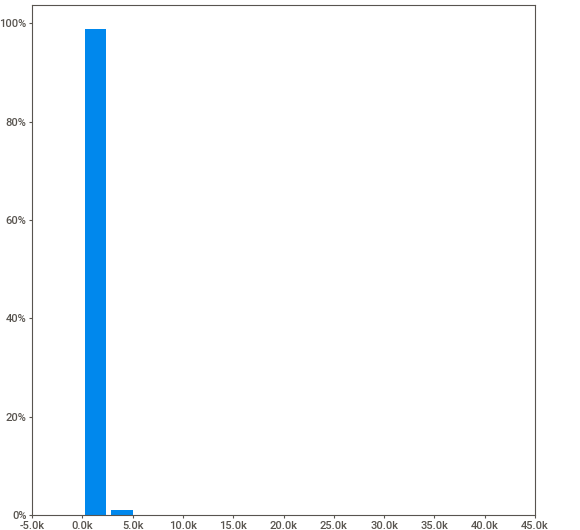
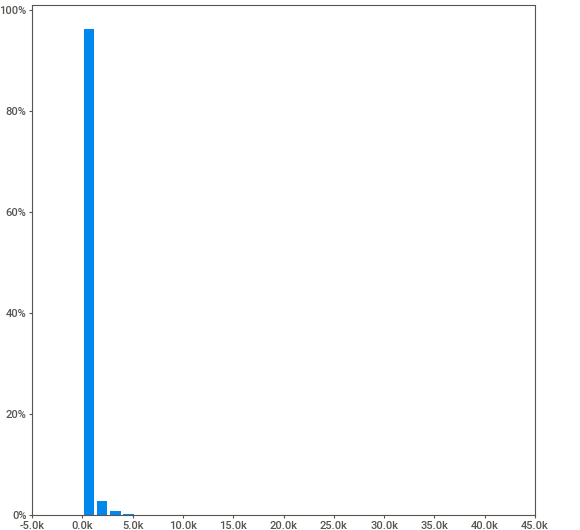
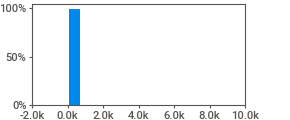
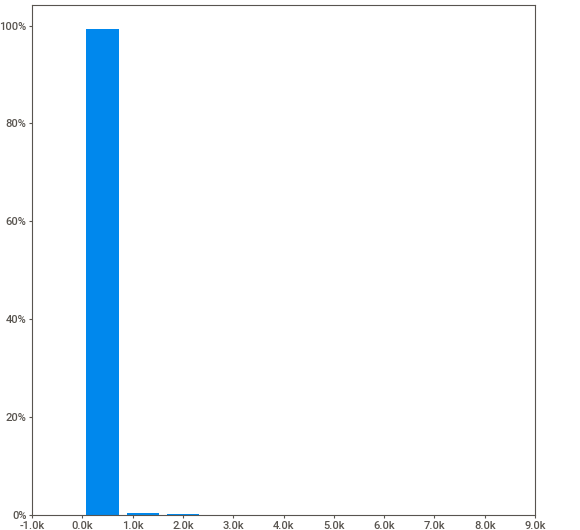
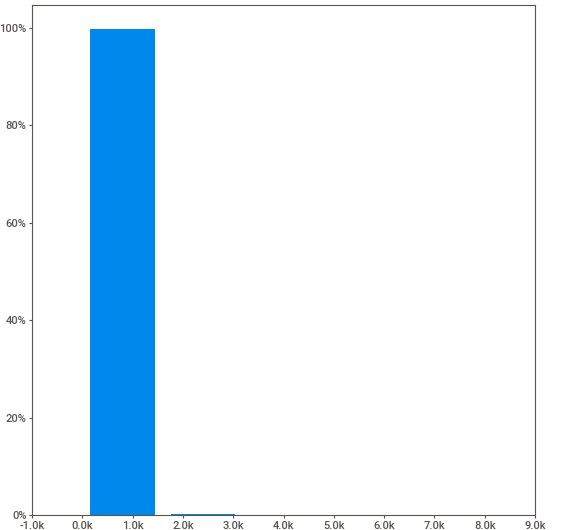
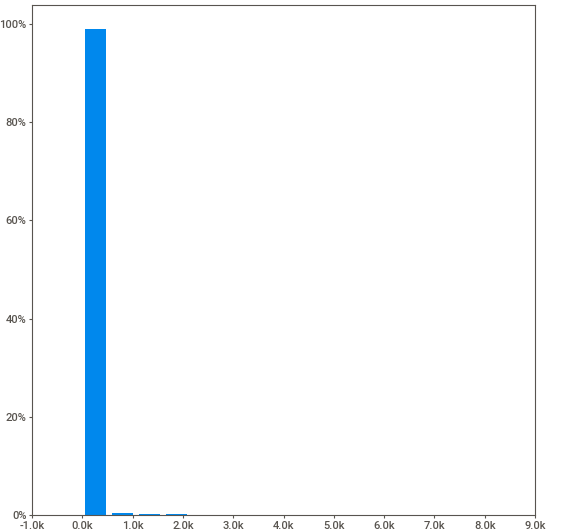
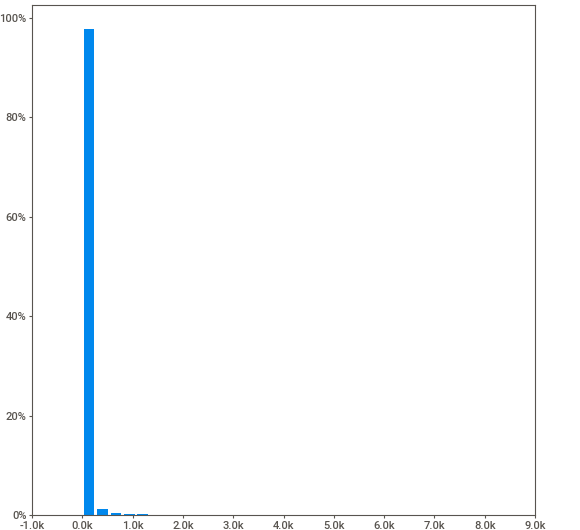
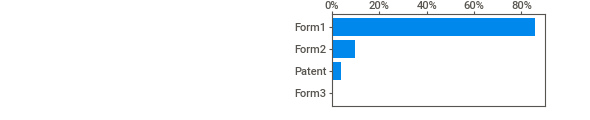
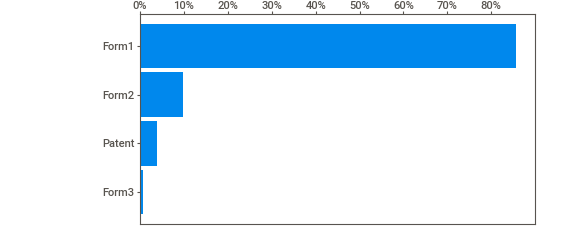
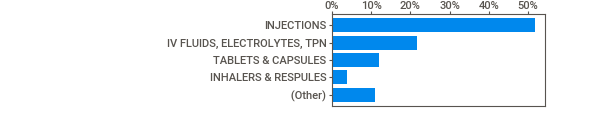
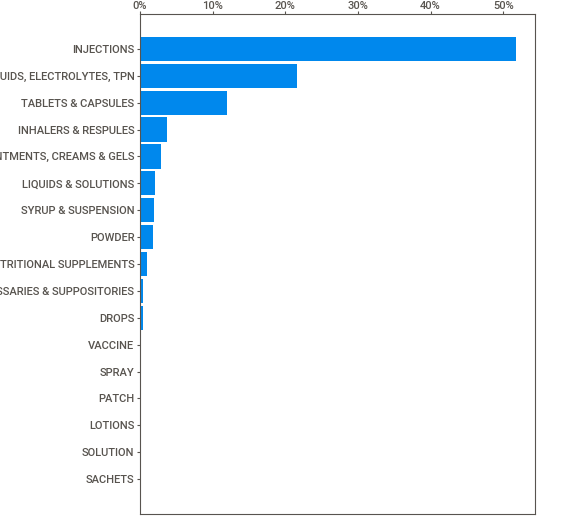
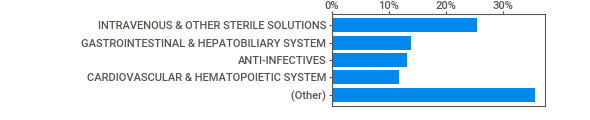
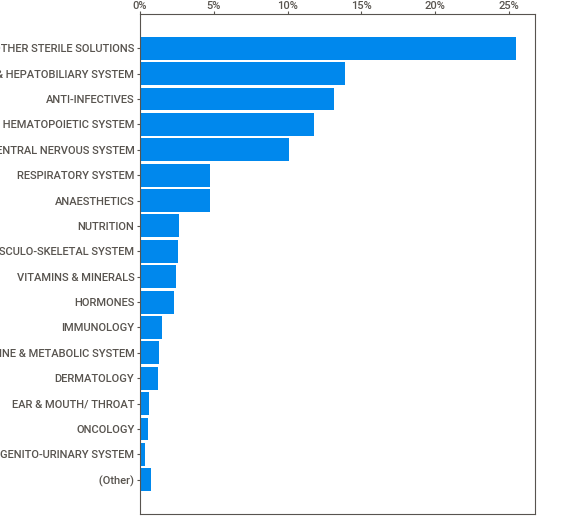
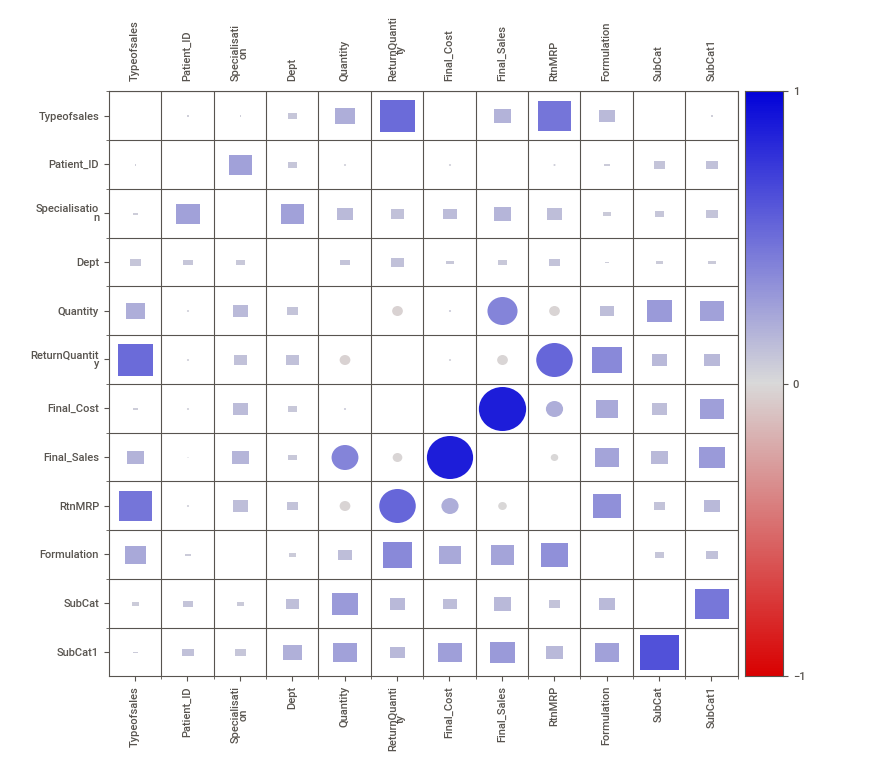
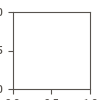

In [ ]:
import sweetviz as sv

s = sv.analyze(df)
s.show_notebook()